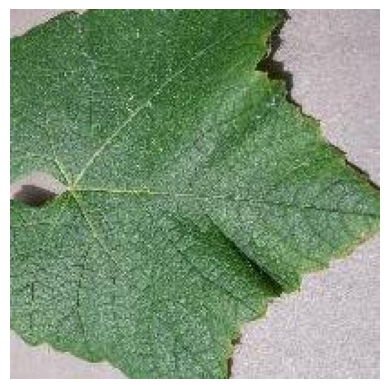

Predicted Class:  Grapes


In [41]:
import torch
import torchvision.models as models
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
from torch.utils.data import Subset
from torchvision.transforms import Compose, ToTensor, Resize, Normalize
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import asarray
from PIL import Image
import pathlib
import os
import time
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score
import seaborn as sns
from sklearn.manifold import TSNE

loader = transforms.Compose([transforms.ToTensor()])
device = "cpu"
model = models.inception_v3(weights=None)
model.aux_logits = False
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 4)
model = model.to(device)
model.load_state_dict(torch.load('GoogleNet_Dataset3.pth',map_location=torch.device('cpu')))
model.eval()

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
# Define the transformation
loader = transforms.Compose([
    transforms.Resize((299, 299)),  # Resize to 299x299 for Inception v3 model
    transforms.ToTensor(),
    normalize,  # Add normalization
])

def image_loader(image_name):
    """load image, returns tensor"""
    image = Image.open(image_name).convert('RGB')
    image = loader(image).unsqueeze(0)
    return image

# Update the path of the image for prediction
image_path = "/Users/karthikd1054/Documents/COMP 6721/Project/plant_leaf_dataset/dataset3/Grapes/image (672).jpg" 
image = image_loader(image_path)

with torch.no_grad():
    output = model(image)
    ps = torch.exp(output)
    _, predTest = torch.max(ps, 1)

# Load the image for viewing
output_array = np.array(Image.open(image_path))

# Display the image
plt.imshow(output_array)
plt.axis('off')
plt.show()

classes = ['Apple','Blueberry','Cherry','Grapes']

# Print the prediction
print("Predicted Class: ", classes[predTest.item()])